### Init GD and Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
bank_data = pd.read_csv('/content/drive/MyDrive/Data/bank_loan.csv')

### Functions

In [80]:
def show_and_imput_missing_values(df, columns):
    df = df.copy()  # avoid modifying original

    print("=== Missing Value Imputation Report ===")

    # Separate column types
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Handle numeric columns
    for col in numeric_cols:
        missing_count = df[col].isna().sum()
        if missing_count > 0:
            if columns and col in columns:
                df[col + '_missing'] = df[col].isna().astype(int)  # indicator column
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"Numeric Column: '{col}' | Missing: {missing_count} | Filled with median ({median_val})")
            print("Unique values: " + str(df[col].unique()[0:10]) + "\n")
    # Handle categorical columns
    for col in categorical_cols:
        missing_count = df[col].isna().sum()
        if missing_count > 0:
            df[col] = df[col].fillna("Unknown")
            print(f"Categorical Column: '{col}' | Missing: {missing_count} | Filled with 'Unknown'")
            print("Unique values: " + str(df[col].unique()) + "\n")


    print("=== Imputation Complete ===\n")
    return df

### Initial Data glimpse

In [4]:
bank_data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
0,2072-08-01,22,63052,631,Employed,Master,2,18271,12,Married,...,5254.333333,0.639338,3.0,1409,0.167771,0.156702,1654.893043,0.397366,51.0,0
1,2068-04-14,42,62117,522,Employed,Associate,20,29281,108,Divorced,...,5176.416667,0.835783,5.0,106328,0.313281,0.294022,774.117592,0.190888,50.0,0
2,2062-04-07,31,32448,544,Employed,Bachelor,5,33395,60,Divorced,...,2704.000000,0.879069,3.0,8626,0.266395,0.286945,1053.817922,0.531368,54.0,0
3,2031-05-29,19,32182,478,Unemployed,Master,0,49105,24,Single,...,2681.833333,0.868833,7.0,96744,0.285105,0.247245,2614.025710,1.125732,53.0,0
4,2024-04-04,45,77191,646,Employed,Master,21,99655,24,Married,...,6432.583333,0.982722,8.0,16312,0.251655,0.256010,5348.835792,0.924642,52.0,0


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2050 non-null   object 
 1   Age                         2050 non-null   int64  
 2   AnnualIncome                2050 non-null   int64  
 3   CreditScore                 2050 non-null   int64  
 4   EmploymentStatus            1976 non-null   object 
 5   EducationLevel              2050 non-null   object 
 6   Experience                  2050 non-null   int64  
 7   LoanAmount                  2050 non-null   object 
 8   LoanDuration                2050 non-null   int64  
 9   MaritalStatus               2050 non-null   object 
 10  NumberOfDependents          1963 non-null   float64
 11  HomeOwnershipStatus         1951 non-null   object 
 12  MonthlyDebtPayments         2009 non-null   float64
 13  CreditCardUtilizationRate   2050 

In [6]:
bank_data.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,1963.000000,2009.000000,2050.000000,2050.000000,2050.000000,...,2050.000000,2050.000000,1936.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,39.952195,1.558224e+05,572.662927,17.353659,54.058537,1.455425,457.295669,0.294761,2.848780,0.968780,...,4759.490569,0.791977,5.076963,7.737341e+04,0.240882,0.240792,931.094014,0.405455,50.774927,0.239024
std,11.702246,9.780950e+05,63.820500,11.614698,24.404283,1.367463,239.521001,0.162348,1.899773,0.969018,...,3156.760304,0.122874,2.229185,1.340863e+05,0.035993,0.042887,710.769016,0.334684,7.745501,0.426592
min,18.000000,1.500000e+04,384.000000,-4.000000,12.000000,0.000000,85.000000,0.004364,-4.000000,0.000000,...,625.000000,0.276100,0.000000,1.018000e+03,0.130338,0.113310,118.491581,0.034436,30.400000,0.000000
25%,32.000000,3.274900e+04,538.000000,9.000000,36.000000,0.000000,289.000000,0.169033,2.000000,0.000000,...,2586.062500,0.712901,3.000000,9.073750e+03,0.215449,0.210321,511.277136,0.180706,46.000000,0.000000
50%,40.000000,4.926900e+04,575.000000,17.000000,48.000000,1.000000,405.000000,0.278739,3.000000,1.000000,...,3869.750000,0.809762,5.000000,3.569450e+04,0.238110,0.237375,735.522113,0.305972,51.000000,0.000000
75%,48.000000,7.434200e+04,608.000000,25.000000,72.000000,2.000000,568.000000,0.401770,4.000000,2.000000,...,5931.875000,0.887293,6.000000,9.202675e+04,0.264231,0.268571,1118.015055,0.518579,56.000000,0.000000
max,80.000000,1.000000e+07,950.000000,60.000000,120.000000,5.000000,2375.000000,0.835776,10.000000,5.000000,...,21606.500000,0.996563,12.000000,1.645402e+06,0.384555,0.395984,7859.855080,4.143180,76.000000,1.000000


### NaN Values Handeling

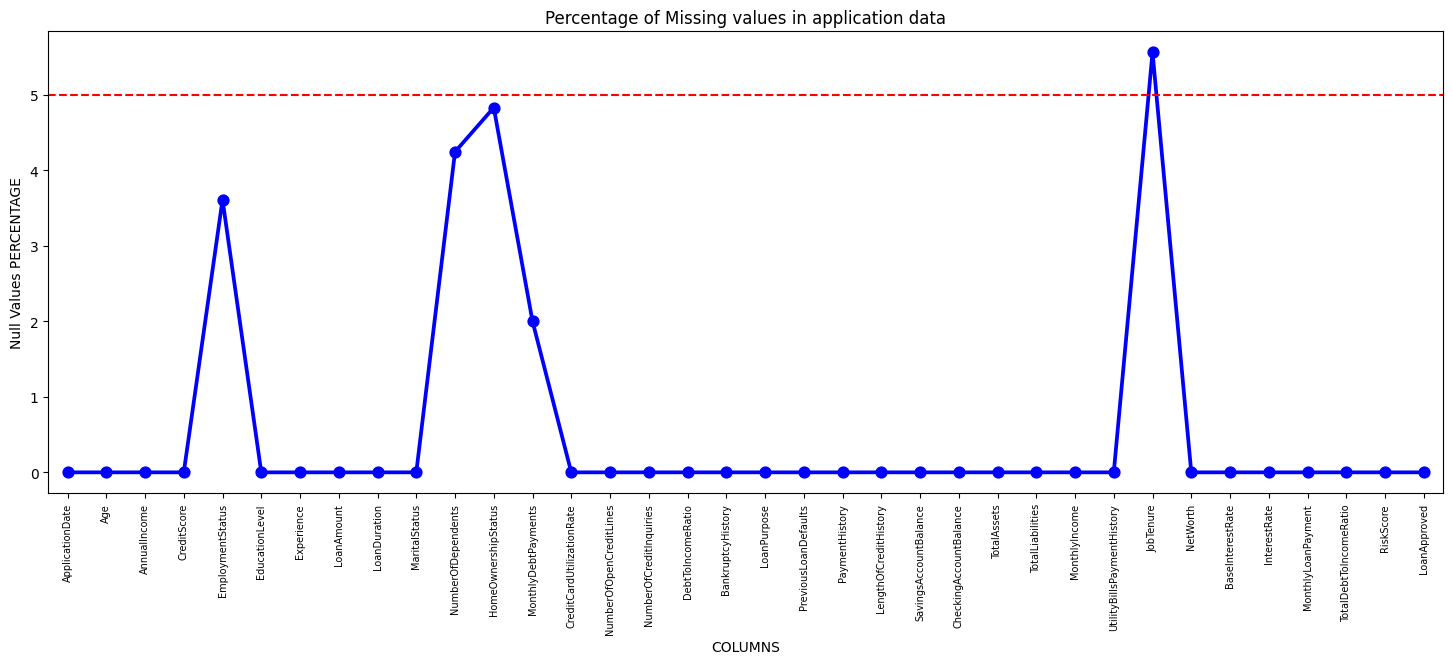

In [24]:
null_DF = pd.DataFrame((bank_data.isnull().sum())*100/bank_data.shape[0]).reset_index()
null_DF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_DF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(5, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [58]:
bank_data['JobTenure'].unique()

array([ 3.,  5.,  7.,  8.,  4.,  2.,  6., 10.,  9., 11.,  1., 12.,  0.])

In [82]:
bank_data = show_and_imput_missing_values(bank_data, bank_data.columns.tolist())

=== Missing Value Imputation Report ===
Numeric Column: 'NumberOfDependents' | Missing: 87 | Filled with median (1.0)
Unique values: [1. 0. 4. 3. 2. 5.]

Numeric Column: 'MonthlyDebtPayments' | Missing: 41 | Filled with median (405.0)
Unique values: [433. 214. 383. 405. 599. 248. 452. 518. 525. 392.]

Numeric Column: 'JobTenure' | Missing: 114 | Filled with median (5.0)
Unique values: [ 3.  5.  7.  8.  4.  2.  6. 10.  9. 11.]

Categorical Column: 'EmploymentStatus' | Missing: 74 | Filled with 'Unknown'
Unique values: ['Employed' 'Unemployed' 'Self-Employed' 'Unknown']

Categorical Column: 'HomeOwnershipStatus' | Missing: 99 | Filled with 'Unknown'
Unique values: ['Other' 'Rent' 'Mortgage' 'Own' 'Unknown']

=== Imputation Complete ===



In [90]:
from scipy import stats
from scipy.stats import shapiro, kstest
import seaborn as sns

In [96]:
def correlation_with_target(data, target_col, alpha=0.05):
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    if target_col not in numeric_cols:
        numeric_cols.append(target_col)

    results = []

    for col in numeric_cols:
        if col == target_col:
            continue

        x = data[col].dropna()
        y = data[target_col].dropna()

        # Align indexes (in case of NaNs removed)
        df_temp = pd.concat([x, y], axis=1).dropna()
        x, y = df_temp[col], df_temp[target_col]

        # Skip constant columns
        if x.nunique() < 2 or y.nunique() < 2:
            results.append([col, "N/A", np.nan, np.nan, False])
            continue

        # Normality test (ks)
        p_x = kstest(x, stats.norm.cdf)[1]
        p_y = kstest(y, stats.norm.cdf)[1]

        if p_x > 0.05 and p_y > 0.05:
            # Both normal → Pearson
            method = "Pearson"
            corr, pval = stats.pearsonr(x, y)
        else:
            # Otherwise → Spearman
            method = "Spearman"
            corr, pval = stats.spearmanr(x, y)

        results.append([col, method, corr, pval, pval < alpha])

    results_df = pd.DataFrame(results, columns=["Feature", "Method", "Correlation", "P-value", "Significant"])
    return results_df

In [97]:
results_df = correlation_with_target(bank_data, "LoanApproved", alpha=0.05)

In [98]:
results_df

,Feature,Method,Correlation,P-value,Significant
0,Age,Spearman,0.144473,4.970337e-11,True
1,AnnualIncome,Spearman,0.550485,8.996773e-163,True
2,CreditScore,Spearman,0.138352,3.161893e-10,True
3,Experience,Spearman,0.133294,1.374016e-09,True
4,LoanDuration,Spearman,-0.090924,3.742811e-05,True
5,NumberOfDependents,Spearman,-0.008454,7.020427e-01,False
6,MonthlyDebtPayments,Spearman,-0.081166,2.343669e-04,True
7,CreditCardUtilizationRate,Spearman,-0.014762,5.041186e-01,False
8,NumberOfOpenCreditLines,Spearman,0.001500,9.458936e-01,False
9,NumberOfCreditInquiries,Spearman,0.048178,2.916067e-02,True
